In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
R = np.random.randn(5, 5)
A = R.T + R

In [59]:
evals, evecs = np.linalg.eig(A)

In [60]:
diag = np.diag(evals)
Ar = evecs @ diag @ np.linalg.inv(evecs)
print(np.allclose(A, Ar))
dist0 = np.sqrt(np.sum((A-Ar)**2))
print(dist0)

True
6.3630640794832335e-15


In [61]:
evals_copy = evals.copy()
np.random.shuffle(evals_copy)
diag_bar = np.diag(evals_copy)
Ar_bar = evecs @ diag_bar @ np.linalg.inv(evecs)
print(np.allclose(A, Ar_bar))
dist1 = np.sqrt(np.sum((A-Ar_bar)**2))
print(dist1)

False
12.438672514880173


In [62]:
evals_copy = evals.copy()
evals_inc = np.argsort(evals)
evals_copy[evals_inc[0]], evals_copy[evals_inc[1]] = evals_copy[evals_inc[1]], evals_copy[evals_inc[0]]
diag_bar = np.diag(evals_copy)
Ar_bar = evecs @ diag_bar @ np.linalg.inv(evecs)
dist2 = np.sum((A - Ar_bar)**2)
print(dist2)

9.6683228680263


In [63]:
evals_copy = evals.copy()
evals_dec = np.flip(np.argsort(evals))
evals_copy[evals_dec[0]], evals_copy[evals_dec[1]] = evals_copy[evals_dec[1]], evals_copy[evals_dec[0]]
diag_bar = np.diag(evals_copy)
Ar_bar = evecs @ diag_bar @ np.linalg.inv(evecs)
dist3 = np.sqrt(np.sum((A - Ar_bar)**2))
print(dist3)

0.5813543140802999


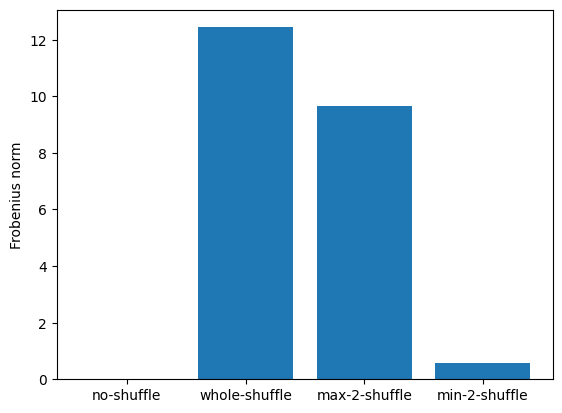

In [64]:
fig, ax = plt.subplots()
x = np.arange(4)
y = [dist0, dist1, dist2, dist3]
ax.bar(x, y)
ax.set_ylabel("Frobenius norm")
plt.xticks(x, ["no-shuffle", "whole-shuffle", "max-2-shuffle", "min-2-shuffle"])
plt.show()